# Data Science in Finance and Insurance - Project

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Feature Selection

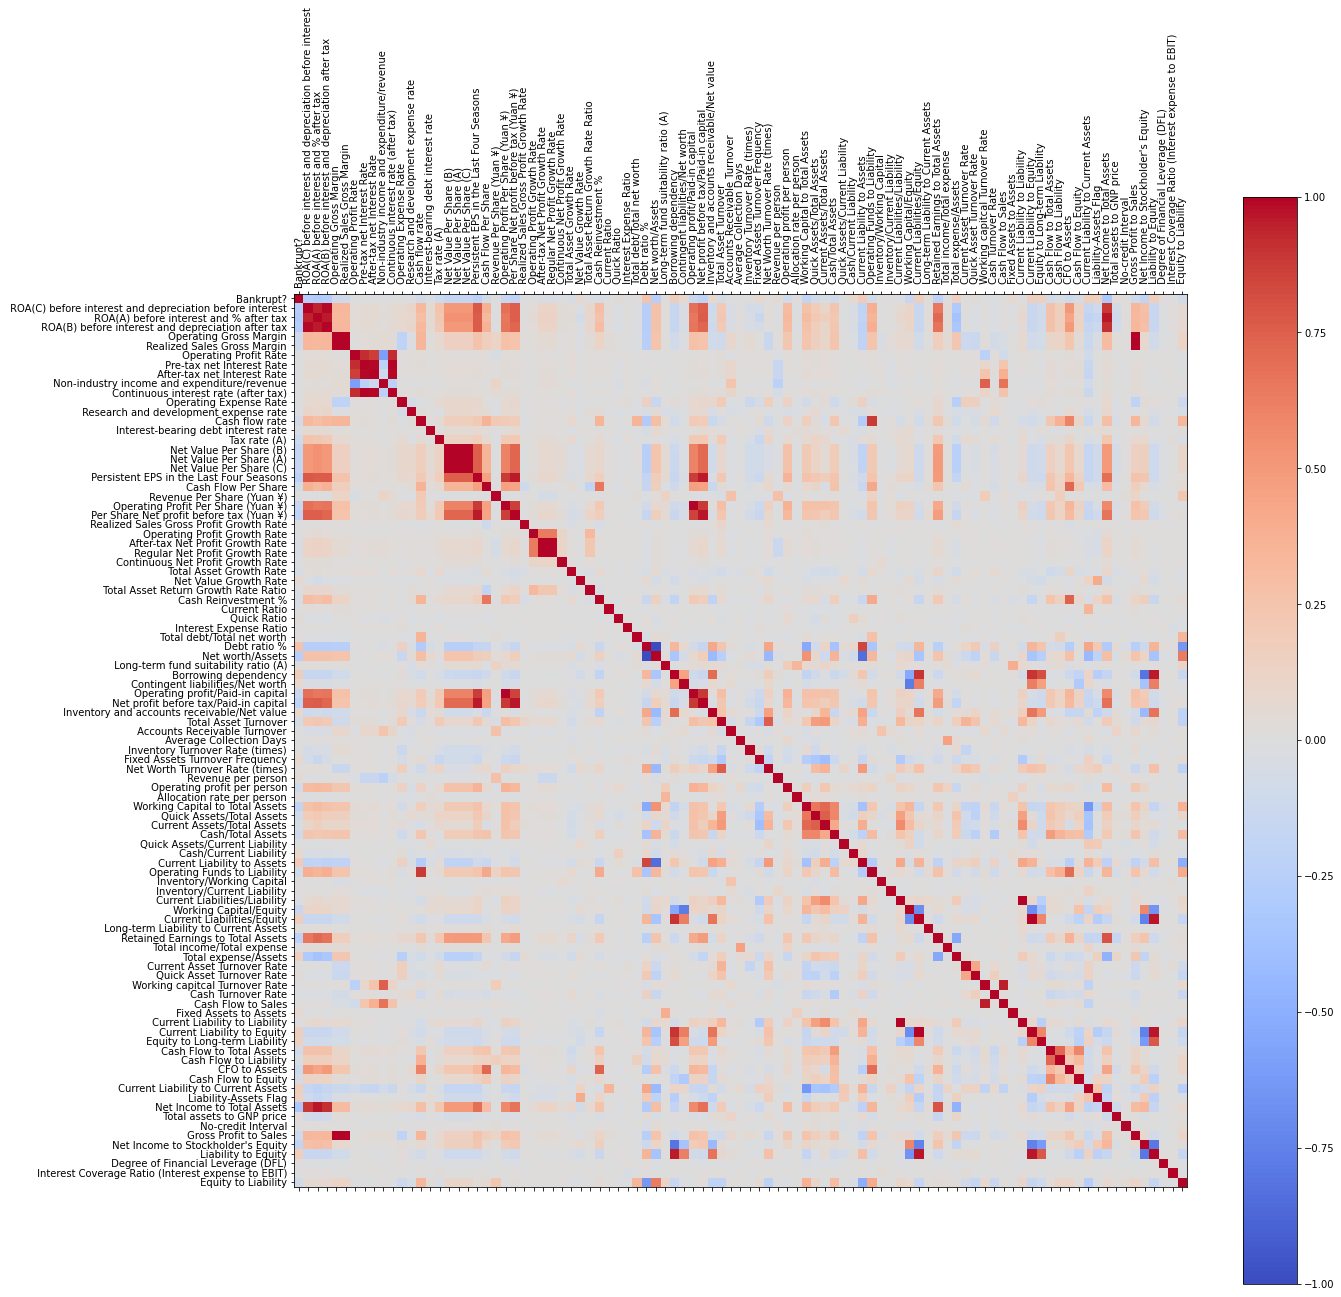

In [2]:
bdata = pd.read_csv("data.csv")

#Var[X_{Net Income Flag}] = 0, drop it
bdata = bdata.drop([' Net Income Flag'], axis = 1)

#Correlation Matrix
corrMat = bdata.corr()

#create color
fig,ax = plt.subplots(1,1, figsize = (20, 20))
cax = ax.matshow(corrMat, interpolation = 'nearest', cmap = "coolwarm")
fig.colorbar(cax)

list_cols = list(bdata.columns.values)
ax.set_xticks([i for i in range(len(list_cols))], labels = list_cols)
ax.set_yticks([i for i in range(len(list_cols))], labels = list_cols)
ax.tick_params(axis = 'x', labelrotation = 90)

plt.show()

In [3]:
# Find variables most correlated with Bankruptcy
bankCorr = corrMat['Bankrupt?'].sort_values(ascending = True)

negbankCorr = bankCorr[0:10]

posbankCorr = bankCorr[len(bankCorr) - 11:len(bankCorr) - 1]

negbankCorr

 Net Income to Total Assets                                -0.315457
 ROA(A) before interest and % after tax                    -0.282941
 ROA(B) before interest and depreciation after tax         -0.273051
 ROA(C) before interest and depreciation before interest   -0.260807
 Net worth/Assets                                          -0.250161
 Persistent EPS in the Last Four Seasons                   -0.219560
 Retained Earnings to Total Assets                         -0.217779
 Net profit before tax/Paid-in capital                     -0.207857
 Per Share Net profit before tax (Yuan ¥)                  -0.201395
 Working Capital to Total Assets                           -0.193083
Name: Bankrupt?, dtype: float64

In [4]:
posbankCorr

 Equity to Long-term Liability          0.139014
 Total expense/Assets                   0.139049
 Liability-Assets Flag                  0.139212
 Current Liability to Equity            0.153828
 Current Liabilities/Equity             0.153828
 Liability to Equity                    0.166812
 Current Liability to Current Assets    0.171306
 Borrowing dependency                   0.176543
 Current Liability to Assets            0.194494
 Debt ratio %                           0.250161
Name: Bankrupt?, dtype: float64

In [5]:
#Create correlation matrix out of just those variables
highCorrfeatures = np.append(negbankCorr.index.values, posbankCorr.index.values)
corrdata = bdata[highCorrfeatures]

corrdataMat = corrdata.corr()

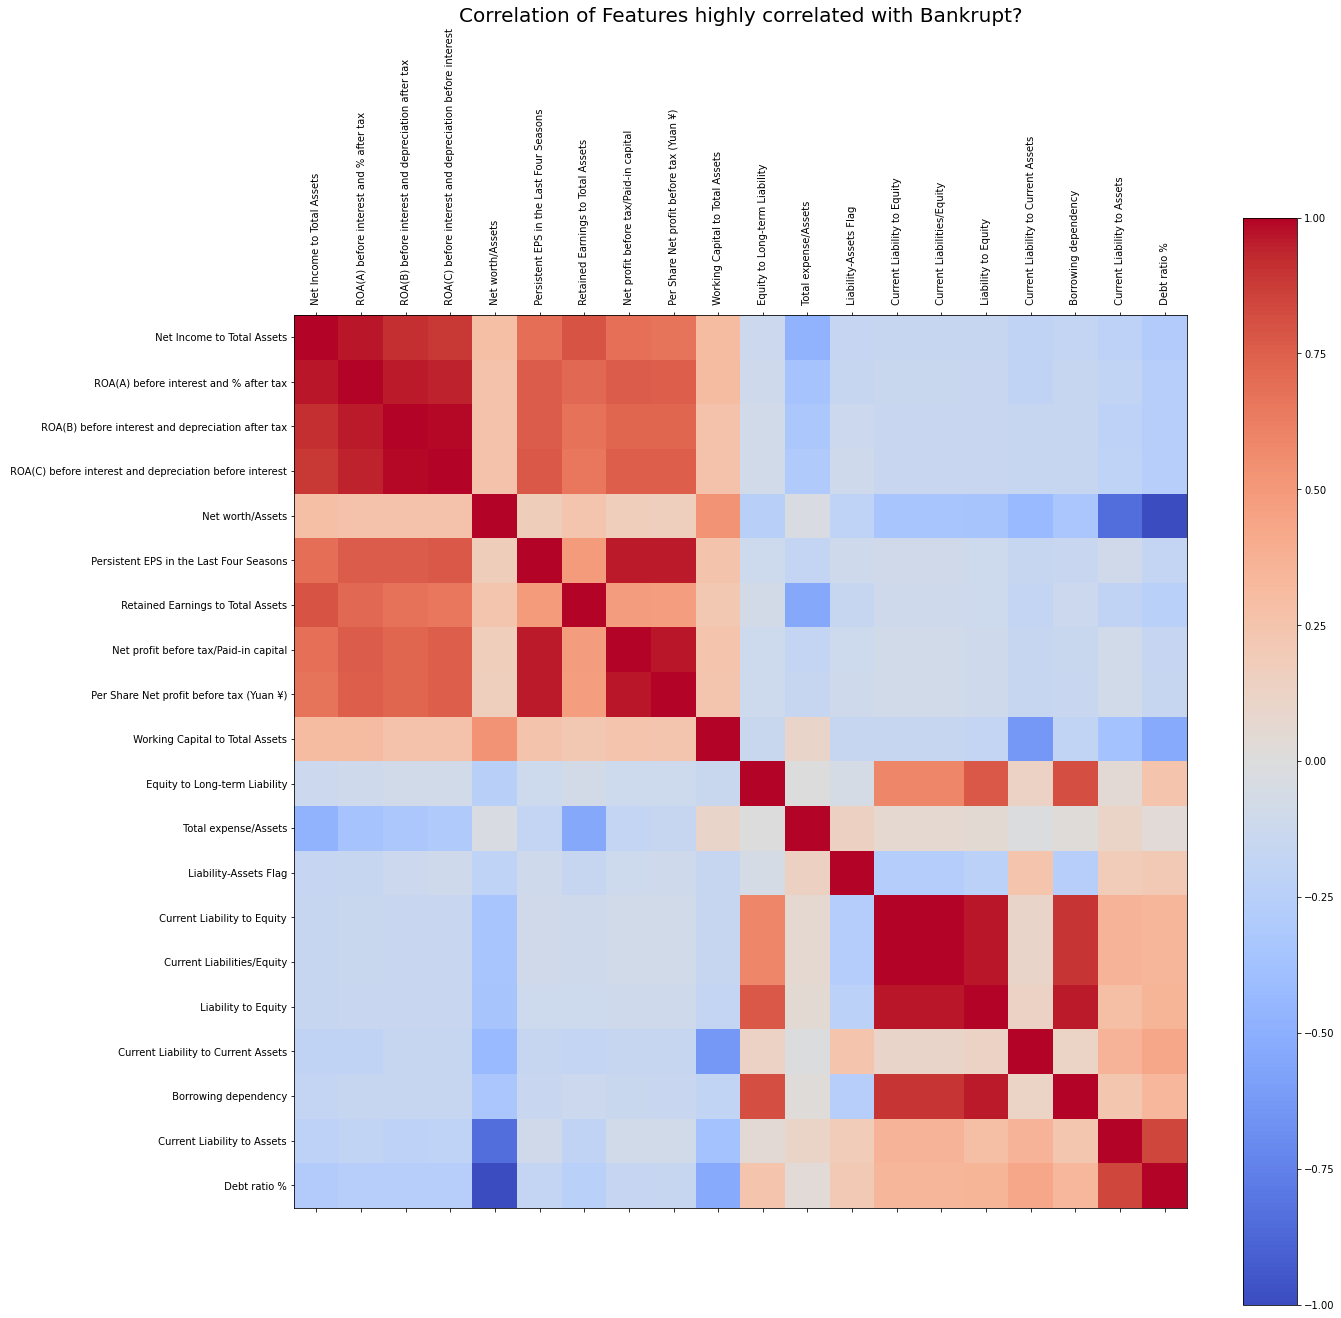

In [6]:
#Plot said matrix
#create color
fig2,ax2 = plt.subplots(1,1, figsize = (20, 20))
cax2 = ax2.matshow(corrdataMat, interpolation = 'nearest', cmap = "coolwarm")
fig2.colorbar(cax2)

list_cols2 = list(corrdata.columns.values)
ax2.set_xticks([i for i in range(len(list_cols2))], labels = list_cols2)
ax2.set_yticks([i for i in range(len(list_cols2))], labels = list_cols2)
ax2.tick_params(axis = 'x', labelrotation = 90)
ax2.set_title("Correlation of Features highly correlated with Bankrupt?", size = 20)

plt.show()

In [7]:
bdata

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,0.044009


# Decision Tree

In [103]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [94]:
X = bdata.drop('Bankrupt?', axis=1)
y = bdata['Bankrupt?']

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:
dt_model = DecisionTreeClassifier(random_state=42)

In [112]:
best_dt = DecisionTreeClassifier(max_depth=10, max_features='auto', min_samples_leaf=4,
                       min_samples_split=10, random_state=42)

In [116]:
best_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, max_features='auto', min_samples_leaf=4,
                       min_samples_split=10, random_state=42)

In [117]:
predictions = best_dt.predict(X_test)

In [118]:
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, predictions))

Accuracy: 0.9618768328445748
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1313
           1       0.48      0.24      0.32        51

    accuracy                           0.96      1364
   macro avg       0.73      0.61      0.65      1364
weighted avg       0.95      0.96      0.96      1364



In [100]:
cv_scores = cross_val_score(dt_model, X, y, cv=5)
print(f"Cross-validated accuracy scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores)}")

Cross-validated accuracy scores: [0.93328446 0.90102639 0.95234604 0.95381232 0.95891416]
Mean CV Accuracy: 0.9398766736304898


In [110]:
param_grid = {
    'criterion': ['gini', 'entropy'],  
    'max_depth': [None, 10, 20, 30, 40, 50],  
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4],  
    'max_features': [None, 'auto', 'sqrt', 'log2'] 
}

In [111]:
# GridSearchCV
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

# Best parameters and model
print("Best parameters: ", grid_search.best_params_)
print("Best model: ", grid_search.best_estimator_)

最佳参数:  {'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10}
最佳模型:  DecisionTreeClassifier(max_depth=10, max_features='auto', min_samples_leaf=4,
                       min_samples_split=10, random_state=42)


Oversample

In [120]:
from imblearn.over_sampling import SMOTE

In [87]:
bdata['Bankrupt?'].value_counts(dropna=False)

Bankrupt?
0    6599
1     220
Name: count, dtype: int64

In [177]:
# RandomOverSampler
sampler = SMOTE(sampling_strategy={1: 500})
X_rs, y_rs = sampler.fit_resample(X_train, y_train)

In [178]:
dt_model_os = DecisionTreeClassifier(random_state=42)
dt_model_os.fit(X_rs, y_rs)

DecisionTreeClassifier(random_state=42)

In [179]:
predictions_os = dt_model_os.predict(X_test)

In [180]:
accuracy = accuracy_score(y_test, predictions_os)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, predictions_os))

Accuracy: 0.9530791788856305
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1313
           1       0.40      0.49      0.44        51

    accuracy                           0.95      1364
   macro avg       0.69      0.73      0.71      1364
weighted avg       0.96      0.95      0.96      1364



# Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [187]:
# Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
#rf_model.fit(X_rs, y_rs)

RandomForestClassifier(random_state=42)

In [188]:
# Making predictions on the test set
rf_predictions = rf_model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [189]:
# Evaluating model
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(classification_report(y_test, rf_predictions))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1313
           1       0.78      0.14      0.23        51

    accuracy                           0.97      1364
   macro avg       0.87      0.57      0.61      1364
weighted avg       0.96      0.97      0.95      1364



In [192]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

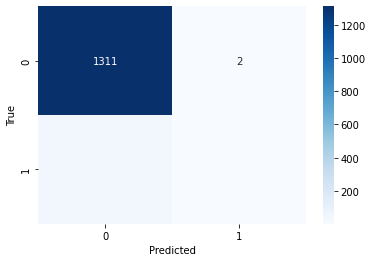

In [198]:
cm = confusion_matrix(y_test, rf_predictions)
# PLOT
#plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [190]:
# Extracting feature importances
feature_importances = rf_model.feature_importances_

features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

rf_accuracy, features_df.head(30)

(0.966275659824047,
                                               Feature  Importance
 29                              Net Value Growth Rate    0.032149
 89                 Net Income to Stockholder's Equity    0.029336
 18            Persistent EPS in the Last Four Seasons    0.024688
 42              Net profit before tax/Paid-in capital    0.021098
 39                               Borrowing dependency    0.019160
 15                            Net Value Per Share (B)    0.017702
 93                                Equity to Liability    0.017133
 91                 Degree of Financial Leverage (DFL)    0.017011
 85                         Net Income to Total Assets    0.016880
 37                                   Net worth/Assets    0.015722
 22           Per Share Net profit before tax (Yuan ¥)    0.015449
 35                         Total debt/Total net worth    0.015362
 8         Non-industry income and expenditure/revenue    0.015280
 34                             Interest E

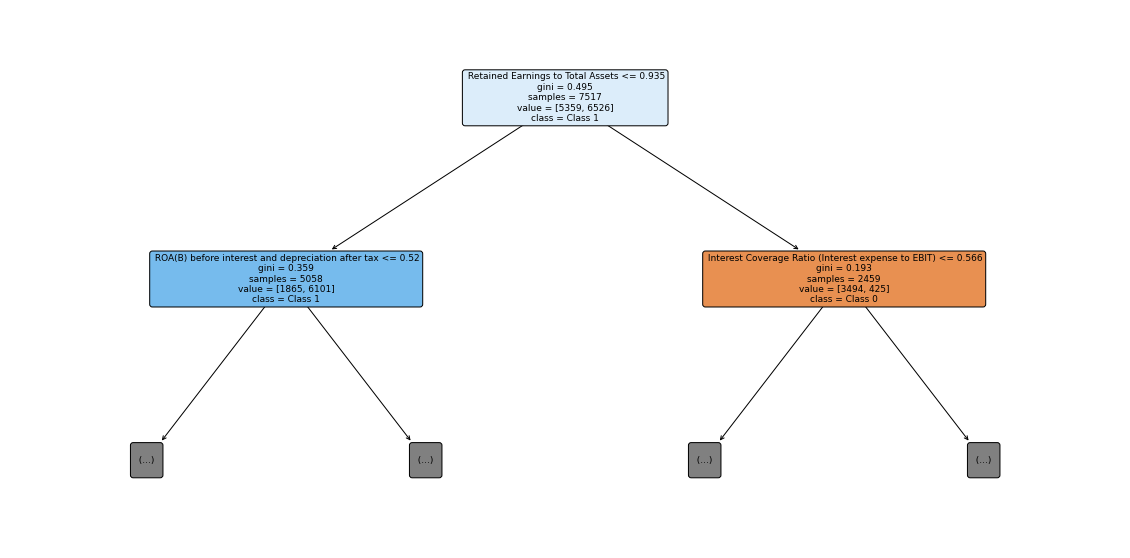

In [78]:
chosen_tree = rf_model.estimators_[0]

max_depth = 1

plt.figure(figsize=(20,10))
plot_tree(chosen_tree, filled=True, feature_names=X_train.columns, class_names=['Class 0', 'Class 1'], rounded=True, max_depth=max_depth)
plt.show()

In [119]:
# 创建随机森林分类器实例
rf = RandomForestClassifier()

# 定义参数网格
param_grid = {
    'n_estimators': [100, 200, 300, 400],  # 树的数量
    'max_features': ['auto', 'sqrt', 'log2'],  # 寻找最佳分割时要考虑的特征数量
    'max_depth': [None, 10, 20, 30, 40],  # 树的最大深度
    'min_samples_split': [2, 5, 10],  # 分裂内部节点所需的最小样本数
    'min_samples_leaf': [1, 2, 4],  # 在叶节点处需要的最小样本数
    'criterion': ['gini', 'entropy']  # 分割质量的评价标准
}

# 创建GridSearchCV实例
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

# 使用数据拟合网格搜索
# 假设 X_train 和 y_train 是你的训练数据和标签
grid_search.fit(X_train, y_train)

# 输出最佳参数和模型
print("最佳参数: ", grid_search.best_params_)
print("最佳模型: ", grid_search.best_estimator_)

KeyboardInterrupt: 